# Bachelor and Bachelorette

#### Questions
1. How many people are eliminated on weeks when they have dates?
2. How many people are eliminated on weeks when they do not have dates?
3. How many 1-1 dates do winners go on?
4. How many group dates do winners go on?
5. How far does the contestant with the first 1-1 get?
6. How many winners had the first impression rose?
7. How far did the first impression rose get?
8. How many first impression roses also had the first date?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#import data
bachelor_df=pd.read_csv('/users/veronicaventure/Desktop/bachelorette.csv')
bachelor_df.head(5)

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
0,SHOW,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,NaN,D1,D6,D13,D9,D7,D1,D1,D1,D1
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,NaN,D10,D8,D13,D9,D1,D3,D1,D1,NaN
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,NaN,D8,D8,D1,D9,D7,D1,D1,NaN,NaN


### Organize Data

##### Create a column that shows the week a contestant was eliminated.

In [27]:
#create column that has the week they were eliminated
bachelor_df['elimination_week']=bachelor_df.apply(lambda x: 
                                                  x.str.match('E', na=False)).dot(bachelor_df.columns + '/').str[:-1]
bachelor_df.head(20)


,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week
0,SHOW,SEASON,ID,1,2,3,4,5,6,7,...,2,3,4,5,6,7,8,9,10,
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,NaN,D6,D13,D1,D7,D1,D1,D1,D1,
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,D1,D6,D13,D9,D7,D1,D1,D1,D1,ELIMINATION-10
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,D10,D8,D13,D9,D1,D3,D1,D1,NaN,ELIMINATION-9
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,D8,D8,D1,D9,D7,D1,D1,NaN,NaN,ELIMINATION-8
5,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,D10,D8,D13,D9,D7,D3,NaN,NaN,NaN,ELIMINATION-7
6,Bachelorette,13,13_MATT_M,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,D10,NaN,D13,D9,D7,D3,NaN,NaN,NaN,ELIMINATION-7
7,Bachelorette,13,13_ALEX_B,NaN,NaN,R,NaN,NaN,E,NaN,...,D10,D6,D13,D9,D7,NaN,NaN,NaN,NaN,ELIMINATION-6
8,Bachelorette,13,13_WILL_G,NaN,NaN,NaN,NaN,R,ED,NaN,...,D10,D6,D13,D9,D1,NaN,NaN,NaN,NaN,ELIMINATION-6
9,Bachelorette,13,13_KENNY_L,NaN,NaN,NaN,NaN,R,ED,NaN,...,D8,D8,D13,D2,D7,NaN,NaN,NaN,NaN,ELIMINATION-6


In [28]:
#abbreviate elimination_week column
bachelor_df['elim_week']=bachelor_df['elimination_week'].str[12:14]

In [29]:
#count rows where contestant was eliminated on week2 when they had a date
el2_date= bachelor_df[(bachelor_df['ELIMINATION-2']== 'E') & (bachelor_df['DATES-2'].notnull())]
el2_date.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,elimination_week,elim_week
20,Bachelorette,13,13_BLAKE_E,NaN,E,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELIMINATION-2,2
21,Bachelorette,13,13_JAMEY_K,NaN,E,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELIMINATION-2,2
22,Bachelorette,13,13_LUCAS_Y,NaN,E,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELIMINATION-2,2
50,Bachelorette,12,12_WILL_H,NaN,E,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELIMINATION-2,2
78,Bachelorette,11,11_DANIEL_F,NaN,E,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELIMINATION-2,2


##### Create new columns for each week to show who had a date and who did not have a date

In [30]:
# create a new column with name week 2 that has a D if the person had a date
bachelor_df['week2']= bachelor_df['DATES-2'].str[0]

In [31]:
#create new column for each week to show who had a date
bachelor_df['week3']= bachelor_df['DATES-3'].str[0]
bachelor_df['week4']= bachelor_df['DATES-4'].str[0]
bachelor_df['week5']= bachelor_df['DATES-5'].str[0]
bachelor_df['week6']= bachelor_df['DATES-6'].str[0]
bachelor_df['week7']= bachelor_df['DATES-7'].str[0]
bachelor_df['week8']= bachelor_df['DATES-8'].str[0]
bachelor_df['week9']= bachelor_df['DATES-9'].str[0]
bachelor_df['week10']= bachelor_df['DATES-10'].str[0]
bachelor_df.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10
0,SHOW,SEASON,ID,1,2,3,4,5,6,7,...,,2,3,4,5,6,7,8,9,1
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,,NaN,D,D,D,D,D,D,D,D
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,10,D,D,D,D,D,D,D,D,D
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,9,D,D,D,D,D,D,D,D,NaN
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,8,D,D,D,D,D,D,D,NaN,NaN


In [38]:
bachelor_df['week2'][(bachelor_df['week2'].isnull())&(bachelor_df['elim_week']!='1')]='ND'
bachelor_df.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,,ND,D,D,D,D,D,D,D,D
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,10,D,D,D,D,D,D,D,D,D
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,9,D,D,D,D,D,D,D,D,NaN
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,8,D,D,D,D,D,D,D,NaN,NaN
5,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,7,D,D,D,D,D,D,NaN,NaN,NaN


In [43]:
bachelor_df['week3'][(bachelor_df['week3'].isnull())&(bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')]='ND'
bachelor_df.head(30)

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,elim_week,week2,week3,week4,week5,week6,week7,week8,week9,week10
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,,ND,D,D,D,D,D,D,D,D
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,10,D,D,D,D,D,D,D,D,D
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,9,D,D,D,D,D,D,D,D,NaN
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,8,D,D,D,D,D,D,D,NaN,NaN
5,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,7,D,D,D,D,D,D,NaN,NaN,NaN
6,Bachelorette,13,13_MATT_M,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,7,D,ND,D,D,D,D,NaN,NaN,NaN
7,Bachelorette,13,13_ALEX_B,NaN,NaN,R,NaN,NaN,E,NaN,...,6,D,D,D,D,D,NaN,NaN,NaN,NaN
8,Bachelorette,13,13_WILL_G,NaN,NaN,NaN,NaN,R,ED,NaN,...,6,D,D,D,D,D,NaN,NaN,NaN,NaN
9,Bachelorette,13,13_KENNY_L,NaN,NaN,NaN,NaN,R,ED,NaN,...,6,D,D,D,D,D,NaN,NaN,NaN,NaN
10,Bachelorette,13,13_ANTHONY_B,NaN,NaN,R,NaN,E,NaN,NaN,...,5,ND,D,D,D,NaN,NaN,NaN,NaN,NaN


In [44]:
bachelor_df['week4'][(bachelor_df['week4'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')]='ND'
bachelor_df['week5'][(bachelor_df['week5'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')]='ND'
bachelor_df['week6'][(bachelor_df['week6'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')
                    &(bachelor_df['elim_week']!='5')]='ND'
bachelor_df['week7'][(bachelor_df['week7'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')
                    &(bachelor_df['elim_week']!='5')
                    &(bachelor_df['elim_week']!='6')]='ND'
bachelor_df['week8'][(bachelor_df['week8'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')
                    &(bachelor_df['elim_week']!='5')
                    &(bachelor_df['elim_week']!='6')
                    &(bachelor_df['elim_week']!='7')]='ND'
bachelor_df['week9'][(bachelor_df['week9'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')
                    &(bachelor_df['elim_week']!='5')
                    &(bachelor_df['elim_week']!='6')
                    &(bachelor_df['elim_week']!='7')
                    &(bachelor_df['elim_week']!='8')]='ND'
bachelor_df['week10'][(bachelor_df['week10'].isnull())&
                     (bachelor_df['elim_week']!='1') &(bachelor_df['elim_week']!='2')
                    &(bachelor_df['elim_week']!='3')
                    &(bachelor_df['elim_week']!='4')
                    &(bachelor_df['elim_week']!='5')
                    &(bachelor_df['elim_week']!='6')
                    &(bachelor_df['elim_week']!='7')
                    &(bachelor_df['elim_week']!='8')
                     &(bachelor_df['elim_week']!='9')]='ND'

In [77]:
bachelor_df.head(50)

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,ND,D,D,D,D,D,D,D,D,9.0
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,D,D,D,D,D,D,D,D,D,8.0
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,D,D,D,D,D,D,D,D,NaN,7.0
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,D,D,D,D,D,D,D,NaN,NaN,6.0
5,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,D,D,D,D,D,D,NaN,NaN,NaN,5.0
6,Bachelorette,13,13_MATT_M,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,D,ND,D,D,D,D,NaN,NaN,NaN,5.0
7,Bachelorette,13,13_ALEX_B,NaN,NaN,R,NaN,NaN,E,NaN,...,D,D,D,D,D,NaN,NaN,NaN,NaN,5.0
8,Bachelorette,13,13_WILL_G,NaN,NaN,NaN,NaN,R,ED,NaN,...,D,D,D,D,D,NaN,NaN,NaN,NaN,5.0
9,Bachelorette,13,13_KENNY_L,NaN,NaN,NaN,NaN,R,ED,NaN,...,D,D,D,D,D,NaN,NaN,NaN,NaN,3.0
10,Bachelorette,13,13_ANTHONY_B,NaN,NaN,R,NaN,E,NaN,NaN,...,ND,D,D,D,NaN,NaN,NaN,NaN,NaN,3.0


In [84]:
dates_df=bachelor_df[['DATES-2','DATES-3','DATES-4','DATES-5','DATES-6','DATES-7','DATES-8','DATES-9','DATES-10']]
dates_df.head(30)

,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
1,NaN,D6,D13,D1,D7,D1,D1,D1,D1
2,D1,D6,D13,D9,D7,D1,D1,D1,D1
3,D10,D8,D13,D9,D1,D3,D1,D1,NaN
4,D8,D8,D1,D9,D7,D1,D1,NaN,NaN
5,D10,D8,D13,D9,D7,D3,NaN,NaN,NaN
6,D10,NaN,D13,D9,D7,D3,NaN,NaN,NaN
7,D10,D6,D13,D9,D7,NaN,NaN,NaN,NaN
8,D10,D6,D13,D9,D1,NaN,NaN,NaN,NaN
9,D8,D8,D13,D2,D7,NaN,NaN,NaN,NaN
10,NaN,D1,D13,D9,NaN,NaN,NaN,NaN,NaN


In [85]:
# this is not giving the correct counts
given_set = {'D'}
bachelor_df['total_dates'] = bachelor_df.isin(given_set).sum(1)
bachelor_df.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,ND,D,D,D,D,D,D,D,D,8
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,D,D,D,D,D,D,D,D,D,9
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,D,D,D,D,D,D,D,D,NaN,8
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,D,D,D,D,D,D,D,NaN,NaN,7
5,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,D,D,D,D,D,D,NaN,NaN,NaN,6


##### Create total date count column

In [81]:
#fix first impression rose errors
bachelor_df['ELIMINATION-1'][(bachelor_df['CONTESTANT']=='09_DREW-K') & (bachelor_df['SEASON']=='09')] = 'R1'
bachelor_df['ELIMINATION-1'][(bachelor_df['CONTESTANT']!='09_DREW_K') & (bachelor_df['ELIMINATION-1']!='E') & (bachelor_df['SEASON']=='09')] = np.nan
bachelor_df['ELIMINATION-1'][(bachelor_df['CONTESTANT']=='17_TIERRA_L') & (bachelor_df['SEASON']=='17')] = 'R1'
bachelor_df['ELIMINATION-1'][(bachelor_df['CONTESTANT']!='17_TIERRA_L') & (bachelor_df['ELIMINATION-1']!='E') & (bachelor_df['SEASON']=='17')] = np.nan

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys

In [97]:
bachelor_df[bachelor_df.SEASON=='17']

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
471,Bachelor,17,17_CATHERINE_G,NaN,NaN,NaN,NaN,NaN,R,NaN,...,D,D,D,D,D,D,D,D,D,9
472,Bachelor,17,17_LINDSAY_Y,NaN,NaN,R,NaN,R,NaN,R,...,ND,D,D,D,D,D,D,D,D,8
473,Bachelor,17,17_ASHLEE_F,NaN,NaN,R,NaN,NaN,NaN,NaN,...,ND,D,D,D,D,D,D,D,NaN,7
474,Bachelor,17,17_DESIREE_H,NaN,R,NaN,NaN,NaN,R,NaN,...,D,D,ND,D,D,D,D,NaN,NaN,6
475,Bachelor,17,17_LESLEY_M,NaN,NaN,R,NaN,NaN,R,E,...,D,D,ND,D,D,D,NaN,NaN,NaN,5
476,Bachelor,17,17_TIERRA_L,R1,NaN,NaN,R,R,NaN,EU,...,D,D,D,D,D,ND,NaN,NaN,NaN,5
477,Bachelor,17,17_DANIELLA_M,NaN,NaN,NaN,NaN,R,E,NaN,...,D,D,ND,D,D,NaN,NaN,NaN,NaN,4
478,Bachelor,17,17_SLEMA_A,NaN,NaN,NaN,R,NaN,E,NaN,...,D,ND,D,D,D,NaN,NaN,NaN,NaN,4
479,Bachelor,17,17_SARAH_H,NaN,R,NaN,NaN,NaN,EU,NaN,...,D,ND,D,D,D,NaN,NaN,NaN,NaN,4
480,Bachelor,17,17_ROBYN_H,NaN,NaN,NaN,NaN,E,NaN,NaN,...,D,D,D,D,NaN,NaN,NaN,NaN,NaN,4


## Questions

##### How many contestants were eliminated on weeks when they went on dates and did not go on dates?

In [51]:
bachelor_df=bachelor_df[bachelor_df.elim_week !='4/']

In [76]:
bachelor_df['elim_week']=[value or 'winner' for value in bachelor_df['elim_week']]

In [53]:
bachelor_df=bachelor_df[bachelor_df.SEASON !='SEASON']

Text(0.5,1,'Number of Contestants Eliminated Each Week With and Without Dates')

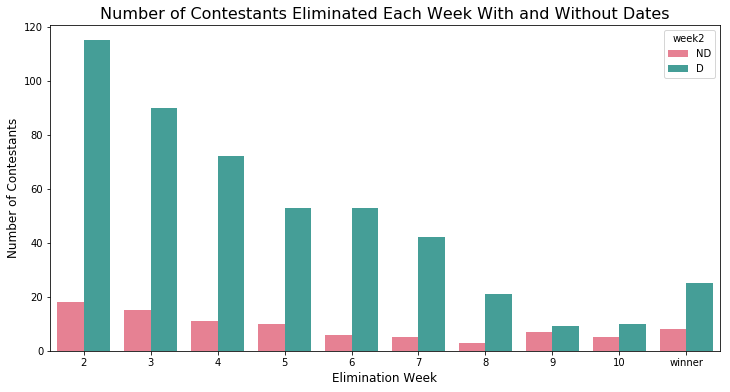

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot('elim_week', data=bachelor_df, hue='week2', palette='husl', order=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'winner'])
plt.xlabel('Elimination Week', fontsize=12)
plt.ylabel('Number of Contestants', fontsize=12)
plt.title('Number of Contestants Eliminated Each Week With and Without Dates', fontsize=16)

In [134]:
bdf_weeks=bachelor_df[['SHOW', 'SEASON','CONTESTANT','week2','week3','week4','week5','week6',
                       'week7','week8','week9','week10', 'elim_week']]
bdf_weeks.head()

,SHOW,SEASON,CONTESTANT,week2,week3,week4,week5,week6,week7,week8,week9,week10,elim_week
1,Bachelorette,13,13_BRYAN_A,ND,D,D,D,D,D,D,D,D,winner
2,Bachelorette,13,13_PETER_K,D,D,D,D,D,D,D,D,D,10
3,Bachelorette,13,13_ERIC_B,D,D,D,D,D,D,D,D,NaN,9
4,Bachelorette,13,13_DEAN_U,D,D,D,D,D,D,D,NaN,NaN,8
5,Bachelorette,13,13_ADAM_G,D,D,D,D,D,D,NaN,NaN,NaN,7


In [135]:
#not sure what this does
bdf_weeks[(bdf_weeks.elim_week =='2') & (bdf_weeks.week2 == 'D')].count()

SHOW          115
SEASON        115
CONTESTANT    115
week2         115
week3           0
week4           0
week5           0
week6           0
week7           0
week8           0
week9           0
week10          0
elim_week     115
dtype: int64

In [136]:
bdf_weeks[(bdf_weeks.elim_week =='2') & (bdf_weeks.week2 == 'ND')].count()

SHOW          18
SEASON        18
CONTESTANT    18
week2         18
week3          0
week4          0
week5          0
week6          0
week7          0
week8          0
week9          0
week10         0
elim_week     18
dtype: int64

In [137]:
bdf_weeks[(bdf_weeks.elim_week =='3') & (bdf_weeks.week3 == 'D')].count()

SHOW          95
SEASON        95
CONTESTANT    95
week2         95
week3         95
week4          0
week5          0
week6          0
week7          0
week8          0
week9          0
week10         0
elim_week     95
dtype: int64

In [138]:
bdf_weeks[(bdf_weeks.elim_week =='3') & (bdf_weeks.week3 == 'ND')].count()

SHOW          10
SEASON        10
CONTESTANT    10
week2         10
week3         10
week4          0
week5          0
week6          0
week7          0
week8          0
week9          0
week10         0
elim_week     10
dtype: int64

In [139]:
bdf_weeks[(bdf_weeks.elim_week =='4') & (bdf_weeks.week4 == 'D')].count()

SHOW          78
SEASON        78
CONTESTANT    78
week2         78
week3         78
week4         78
week5          0
week6          0
week7          0
week8          0
week9          0
week10         0
elim_week     78
dtype: int64

In [140]:
bdf_weeks[(bdf_weeks.elim_week =='4') & (bdf_weeks.week4 == 'ND')].count()

SHOW          5
SEASON        5
CONTESTANT    5
week2         5
week3         5
week4         5
week5         0
week6         0
week7         0
week8         0
week9         0
week10        0
elim_week     5
dtype: int64

In [141]:
bdf_weeks[(bdf_weeks.elim_week =='5') & (bdf_weeks.week5 == 'D')].count()

SHOW          61
SEASON        61
CONTESTANT    61
week2         61
week3         61
week4         61
week5         61
week6          0
week7          0
week8          0
week9          0
week10         0
elim_week     61
dtype: int64

In [142]:
bdf_weeks[(bdf_weeks.elim_week =='5') & (bdf_weeks.week5 == 'ND')].count()

SHOW          2
SEASON        2
CONTESTANT    2
week2         2
week3         2
week4         2
week5         2
week6         0
week7         0
week8         0
week9         0
week10        0
elim_week     2
dtype: int64

In [144]:
bdf_weeks[(bdf_weeks.elim_week =='6') & (bdf_weeks.week6 == 'D')].count()

SHOW          57
SEASON        57
CONTESTANT    57
week2         57
week3         57
week4         57
week5         57
week6         57
week7          0
week8          0
week9          0
week10         0
elim_week     57
dtype: int64

In [145]:
bdf_weeks[(bdf_weeks.elim_week =='6') & (bdf_weeks.week6 == 'ND')].count()

SHOW          2
SEASON        2
CONTESTANT    2
week2         2
week3         2
week4         2
week5         2
week6         2
week7         0
week8         0
week9         0
week10        0
elim_week     2
dtype: int64

In [146]:
bdf_weeks[(bdf_weeks.elim_week =='7') & (bdf_weeks.week7 == 'D')].count()

SHOW          45
SEASON        45
CONTESTANT    45
week2         45
week3         45
week4         45
week5         45
week6         45
week7         45
week8          1
week9          0
week10         0
elim_week     45
dtype: int64

In [147]:
bdf_weeks[(bdf_weeks.elim_week =='7') & (bdf_weeks.week7 == 'ND')].count()

SHOW          2
SEASON        2
CONTESTANT    2
week2         2
week3         2
week4         2
week5         2
week6         2
week7         2
week8         0
week9         0
week10        0
elim_week     2
dtype: int64

In [148]:
bdf_weeks[(bdf_weeks.elim_week =='8') & (bdf_weeks.week8 == 'D')].count()

SHOW          24
SEASON        24
CONTESTANT    24
week2         24
week3         24
week4         24
week5         24
week6         24
week7         24
week8         24
week9          0
week10         0
elim_week     24
dtype: int64

In [149]:
bdf_weeks[(bdf_weeks.elim_week =='8') & (bdf_weeks.week8 == 'ND')].count()

SHOW          0
SEASON        0
CONTESTANT    0
week2         0
week3         0
week4         0
week5         0
week6         0
week7         0
week8         0
week9         0
week10        0
elim_week     0
dtype: int64

In [150]:
bdf_weeks[(bdf_weeks.elim_week =='9') & (bdf_weeks.week9 == 'D')].count()

SHOW          15
SEASON        15
CONTESTANT    15
week2         15
week3         15
week4         15
week5         15
week6         15
week7         15
week8         15
week9         15
week10         0
elim_week     15
dtype: int64

In [151]:
bdf_weeks[(bdf_weeks.elim_week =='9') & (bdf_weeks.week9 == 'ND')].count()

SHOW          1
SEASON        1
CONTESTANT    1
week2         1
week3         1
week4         1
week5         1
week6         1
week7         1
week8         1
week9         1
week10        0
elim_week     1
dtype: int64

In [152]:
bdf_weeks[(bdf_weeks.elim_week =='10') & (bdf_weeks.week10 == 'D')].count()

SHOW          14
SEASON        14
CONTESTANT    14
week2         14
week3         14
week4         14
week5         14
week6         14
week7         14
week8         14
week9         14
week10        14
elim_week     14
dtype: int64

In [153]:
bdf_weeks[(bdf_weeks.elim_week =='10') & (bdf_weeks.week10 == 'ND')].count()

SHOW          1
SEASON        1
CONTESTANT    1
week2         1
week3         1
week4         1
week5         1
week6         1
week7         1
week8         1
week9         1
week10        1
elim_week     1
dtype: int64

In [160]:
print('week 2 eliminated with dates percents is' ) 
(115/492)*100
print ('week 3 eliminated with dates percents is')
(95/385)*100

week 2 eliminated with dates percents is
week 3 eliminated with dates percents is


24.675324675324674

In [122]:
elim_df=bachelor_df.groupby(["elim_week", "week5"]).size().reset_index(name="Number Eliminated")
elim_df=pd.DataFrame(elim_df)
elim_df

,elim_week,week5,Number Eliminated
0,10,D,15
1,5,D,61
2,5,ND,2
3,6,D,58
4,6,ND,1
5,7,D,46
6,7,ND,1
7,8,D,23
8,8,ND,1
9,9,D,16


In [87]:
bachelor_df['elim_week'].value_counts()

1         308
2         133
3         105
4          83
5          63
6          59
7          47
winner     33
8          24
9          16
10         15
Name: elim_week, dtype: int64

How many contestants had dates each week? 

In [88]:
bachelor_df['week2'].value_counts()

D     492
ND     88
Name: week2, dtype: int64

In [89]:
bachelor_df['week3'].value_counts()

D     385
ND     60
Name: week3, dtype: int64

In [90]:
bachelor_df['week4'].value_counts()

D     314
ND     26
Name: week4, dtype: int64

In [91]:
bachelor_df['week5'].value_counts()

D     252
ND      5
Name: week5, dtype: int64

In [92]:
bachelor_df['week6'].value_counts()

D     190
ND      4
Name: week6, dtype: int64

In [93]:
bachelor_df['week7'].value_counts()

D     131
ND      4
Name: week7, dtype: int64

In [94]:
bachelor_df['week8'].value_counts()

D     78
ND    11
Name: week8, dtype: int64

In [95]:
bachelor_df['week9'].value_counts()

D     46
ND    18
Name: week9, dtype: int64

In [96]:
bachelor_df['week10'].value_counts()

D     29
ND    19
Name: week10, dtype: int64

##### Analysis of winners

In [98]:
#create new Df with the contestants who make it to week 10
winners=bachelor_df[(bachelor_df['elim_week']=='winner')]
winners.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,ND,D,D,D,D,D,D,D,D,8
33,Bachelorette,12,12_JORDAN_R,R1,NaN,NaN,R,R,NaN,NaN,...,D,D,D,D,D,D,D,D,D,9
60,Bachelorette,11,11_SHAWN_B,R1,NaN,R,NaN,R,NaN,NaN,...,ND,D,D,D,ND,D,D,D,ND,6
87,Bachelorette,10,10_JOSH_M,NaN,NaN,R,NaN,R,NaN,NaN,...,D,D,ND,D,D,D,D,D,D,8
113,Bachelorette,09,09_CHRIS_S,NaN,NaN,R,NaN,R,NaN,NaN,...,ND,D,D,D,D,D,D,D,D,8


##### How many one-on-one dates did winners go on?

In [99]:
#add column to df that shows how many one-one dates the winners went on 
date={'D1'}
winners['one_on_one']=winners.isin(date).sum(1)
winners.head(5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,week3,week4,week5,week6,week7,week8,week9,week10,total_dates,one_on_one
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,D,D,D,D,D,D,D,D,8,5
33,Bachelorette,12,12_JORDAN_R,R1,NaN,NaN,R,R,NaN,NaN,...,D,D,D,D,D,D,D,D,9,5
60,Bachelorette,11,11_SHAWN_B,R1,NaN,R,NaN,R,NaN,NaN,...,D,D,D,ND,D,D,D,ND,6,3
87,Bachelorette,10,10_JOSH_M,NaN,NaN,R,NaN,R,NaN,NaN,...,D,ND,D,D,D,D,D,D,8,5
113,Bachelorette,09,09_CHRIS_S,NaN,NaN,R,NaN,R,NaN,NaN,...,D,D,D,D,D,D,D,D,8,5


Text(0.5,1,'Number of One-On-One Dates the Winners Went On')

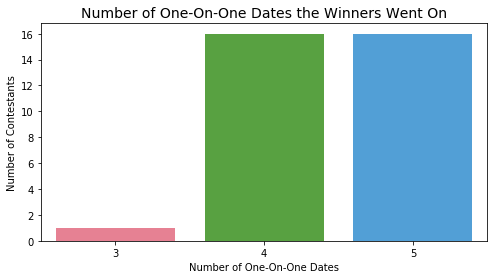

In [100]:
plt.figure(figsize=(8, 4))
sns.countplot('one_on_one', data=winners, palette='husl')
plt.xlabel('Number of One-On-One Dates', fontsize=10)
plt.ylabel('Number of Contestants', fontsize=10)
plt.title('Number of One-On-One Dates the Winners Went On', fontsize=14)

##### How many group dates did winners go on?

In [101]:
group_date={'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9','D10', 'D11', 'D12', 'D13', 'D14', 'D15'}
winners['group_dates']=winners.isin(group_date).sum(1)
winners.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,week4,week5,week6,week7,week8,week9,week10,total_dates,one_on_one,group_dates
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,D,D,D,D,D,D,D,8,5,3
33,Bachelorette,12,12_JORDAN_R,R1,NaN,NaN,R,R,NaN,NaN,...,D,D,D,D,D,D,D,9,5,4
60,Bachelorette,11,11_SHAWN_B,R1,NaN,R,NaN,R,NaN,NaN,...,D,D,ND,D,D,D,ND,6,3,3
87,Bachelorette,10,10_JOSH_M,NaN,NaN,R,NaN,R,NaN,NaN,...,ND,D,D,D,D,D,D,8,5,3
113,Bachelorette,09,09_CHRIS_S,NaN,NaN,R,NaN,R,NaN,NaN,...,D,D,D,D,D,D,D,8,5,3
139,Bachelorette,08,08_JEF_H,NaN,R,NaN,R,R,NaN,NaN,...,D,D,D,D,D,D,D,9,5,4
165,Bachelorette,07,07_JP_R,NaN,NaN,R,NaN,NaN,R,R,...,D,D,D,D,D,D,D,8,5,3
191,Bachelorette,06,06_ROBERT_M,R1,NaN,R,NaN,NaN,NaN,NaN,...,D,D,D,D,D,D,D,8,5,3
217,Bachelorette,05,05_ED_S,NaN,NaN,R,NaN,NaN,NaN,NaN,...,D,D,ND,D,D,D,D,8,5,3
248,Bachelorette,04,04_JESSE_C,R1,NaN,NaN,R,NaN,NaN,NaN,...,D,D,D,D,D,ND,ND,7,4,3


Text(0.5,1,'Number of Group Dates Winners Went On')

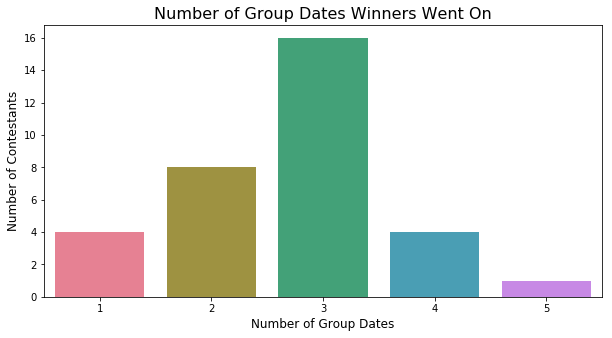

In [102]:
plt.figure(figsize=(10, 5))
sns.countplot('group_dates', data=winners, palette='husl')
plt.xlabel('Number of Group Dates', fontsize=12)
plt.ylabel('Number of Contestants', fontsize=12)
plt.title('Number of Group Dates Winners Went On', fontsize=16)

#### Analysis of first one-on-one date

In [103]:
#df of contestants who had the first 1-1 date
first_date=bachelor_df[(bachelor_df['DATES-2']== 'D1')]
first_date

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,D,D,D,D,D,D,D,D,D,9
39,Bachelorette,12,12_DEREK_P,NaN,R,NaN,NaN,R,ED,NaN,...,D,ND,D,D,D,NaN,NaN,NaN,NaN,4
75,Bachelorette,11,11_CLINT_A,NaN,R,EU,NaN,NaN,NaN,NaN,...,D,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
89,Bachelorette,10,10_CHRIS_S,NaN,R,NaN,NaN,NaN,R,NaN,...,D,ND,ND,D,D,D,D,D,NaN,6
99,Bachelorette,10,10_ERIC_H,NaN,R,NaN,EU,NaN,NaN,NaN,...,D,D,D,NaN,NaN,NaN,NaN,NaN,NaN,3
115,Bachelorette,09,09_BROOKS_F,NaN,R,NaN,NaN,R,NaN,NaN,...,D,D,D,D,D,D,D,ND,NaN,7
123,Bachelorette,09,09_BRYDEN_V,NaN,R,NaN,NaN,EQ,NaN,NaN,...,D,D,D,ND,NaN,NaN,NaN,NaN,NaN,3
145,Bachelorette,08,08_RYAN_B,NaN,R,NaN,NaN,NaN,ED,NaN,...,D,D,D,D,D,NaN,NaN,NaN,NaN,5
157,Bachelorette,08,08_JOE_G,NaN,ED,NaN,NaN,NaN,NaN,NaN,...,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
172,Bachelorette,07,07_RYAN_M,NaN,R,NaN,NaN,NaN,EQ,NaN,...,D,ND,D,D,D,NaN,NaN,NaN,NaN,4


Text(0,0.5,'Number of Contestants')

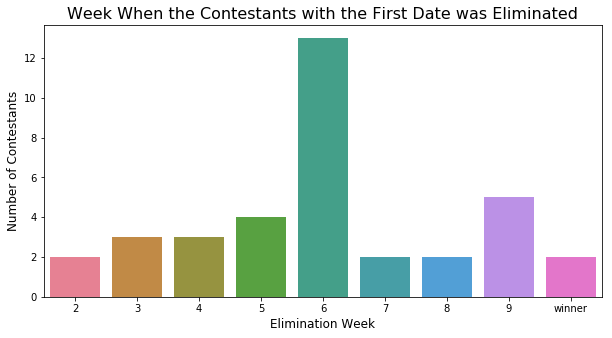

In [104]:
plt.figure(figsize=(10, 5))
sns.countplot('elim_week', data=first_date, order=['2','3','4','5','6','7','8','9','winner'], palette='husl')
plt.title("Week When the Contestants with the First Date was Eliminated", fontsize=16)
plt.xlabel('Elimination Week', fontsize=12 )
plt.ylabel('Number of Contestants', fontsize=12)

In [105]:
elim_counts=first_date['elim_week'].value_counts()
elim_counts=pd.DataFrame(elim_counts).sort_index()


elim_counts

,elim_week
10,2
2,2
3,3
4,3
5,4
6,13
7,2
8,2
9,5
winner,2


#### Analysis of First-Impression Rose

In [106]:
#df of contestants with first impression rose
first_rose= bachelor_df[(bachelor_df['ELIMINATION-1']== 'R1')]
first_rose

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,ND,D,D,D,D,D,D,D,D,8
33,Bachelorette,12,12_JORDAN_R,R1,NaN,NaN,R,R,NaN,NaN,...,D,D,D,D,D,D,D,D,D,9
60,Bachelorette,11,11_SHAWN_B,R1,NaN,R,NaN,R,NaN,NaN,...,ND,D,D,D,ND,D,D,D,ND,6
88,Bachelorette,10,10_NICK_V,R1,NaN,R,NaN,NaN,R,R,...,ND,D,D,D,D,D,D,D,D,8
114,Bachelorette,09,09_DREW_K,R1,NaN,NaN,NaN,NaN,R,R,...,D,D,D,D,D,D,D,D,D,9
144,Bachelorette,08,08_DOUG_C,R1,NaN,NaN,R,NaN,NaN,ED,...,ND,D,D,D,D,D,NaN,NaN,NaN,5
170,Bachelorette,07,07_RYAN_P,R1,NaN,R,NaN,NaN,R,ED,...,ND,D,D,D,D,D,NaN,NaN,NaN,5
191,Bachelorette,06,06_ROBERT_M,R1,NaN,R,NaN,NaN,NaN,NaN,...,ND,D,D,D,D,D,D,D,D,8
227,Bachelorette,05,05_DAVID_G,R1,NaN,NaN,E,NaN,NaN,NaN,...,D,ND,D,NaN,NaN,NaN,NaN,NaN,NaN,2
248,Bachelorette,04,04_JESSE_C,R1,NaN,NaN,R,NaN,NaN,NaN,...,D,D,D,D,D,D,D,ND,ND,7


In [107]:
#how many winners had first rose?

first_roseW= bachelor_df[(bachelor_df['week10']== 'D') & (bachelor_df['ELIMINATION-1']=='R1') ]
first_roseW

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,ND,D,D,D,D,D,D,D,D,8
33,Bachelorette,12,12_JORDAN_R,R1,NaN,NaN,R,R,NaN,NaN,...,D,D,D,D,D,D,D,D,D,9
88,Bachelorette,10,10_NICK_V,R1,NaN,R,NaN,NaN,R,R,...,ND,D,D,D,D,D,D,D,D,8
114,Bachelorette,09,09_DREW_K,R1,NaN,NaN,NaN,NaN,R,R,...,D,D,D,D,D,D,D,D,D,9
191,Bachelorette,06,06_ROBERT_M,R1,NaN,R,NaN,NaN,NaN,NaN,...,ND,D,D,D,D,D,D,D,D,8
352,Bachelor,21,21_VANESSA_G,R1,NaN,R,NaN,NaN,NaN,NaN,...,D,D,D,D,D,D,D,D,D,9
499,Bachelor,16,16_LINDZI_C,R1,NaN,R,NaN,NaN,R,NaN,...,ND,D,D,D,D,D,D,D,D,8


Text(0,0.5,'Number of Contestants')

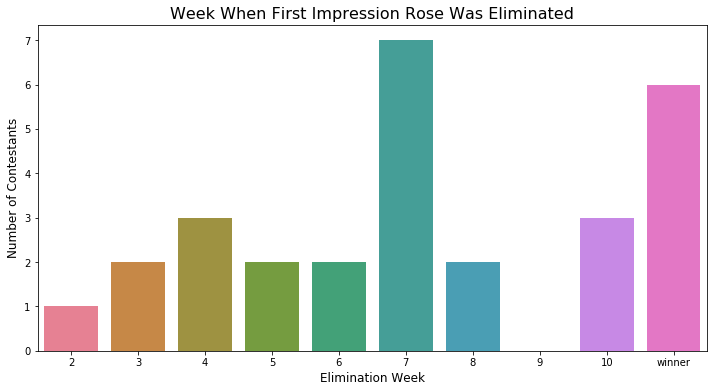

In [108]:
plt.figure(figsize=(12, 6))
sns.countplot('elim_week', data=first_rose, order=['2','3','4','5','6','7','8','9','10','winner'], palette='husl' )
plt.title('Week When First Impression Rose Was Eliminated', fontsize=16)
plt.xlabel('Elimination Week', fontsize=12)
plt.ylabel('Number of Contestants', fontsize=12)

##### How many contestants who got the first impression rose also went on the first date?

In [109]:
#number of contestants who went on the first date who also got first impression rose
first_date_R1=first_date[(first_date['ELIMINATION-1']=='R1')]
first_date_R1

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,week2,week3,week4,week5,week6,week7,week8,week9,week10,total_dates
281,Bachelorette,03,03_KEITH,R1,NaN,E,NaN,NaN,NaN,NaN,...,D,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
667,Bachelor,10,10_STEPHANIE_T,R1,R,NaN,E,NaN,NaN,NaN,...,D,D,D,NaN,NaN,NaN,NaN,NaN,NaN,3
741,Bachelor,07,07_Sarah W.,R1,R,NaN,NaN,NaN,E,NaN,...,D,D,D,D,D,NaN,NaN,NaN,NaN,5
796,Bachelor,05,05_TRISH_S,R1,NaN,NaN,NaN,E,NaN,NaN,...,D,D,D,D,NaN,NaN,NaN,NaN,NaN,4


##### Create New DF for Visualization

In [110]:
new_bach_df=bachelor_df[['SHOW', 'SEASON', 'CONTESTANT', 'ELIMINATION-1', 'DATES-2', 'elim_week', 'total_dates' ]]
new_bach_df=new_bach_df.drop(new_bach_df.index[0])
new_bach_df=new_bach_df[new_bach_df.SEASON !='SEASON']
new_bach_df.head(60)

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
2,Bachelorette,13,13_PETER_K,NaN,D1,10,9
3,Bachelorette,13,13_ERIC_B,NaN,D10,9,8
4,Bachelorette,13,13_DEAN_U,NaN,D8,8,7
5,Bachelorette,13,13_ADAM_G,NaN,D10,7,6
6,Bachelorette,13,13_MATT_M,NaN,D10,7,5
7,Bachelorette,13,13_ALEX_B,NaN,D10,6,5
8,Bachelorette,13,13_WILL_G,NaN,D10,6,5
9,Bachelorette,13,13_KENNY_L,NaN,D8,6,5
10,Bachelorette,13,13_ANTHONY_B,NaN,NaN,5,3
11,Bachelorette,13,13_JOSIAH_G,NaN,D10,5,3


### Bachelorette Visualization

In [111]:
#bachelorette dataframe
bachelorette_df=new_bach_df[new_bach_df.SHOW!='Bachelor']
bachelorette_df.tail(10)

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
341,Bachelorette,01,01_BILLY_X,E,NaN,1,0
342,Bachelorette,01,01_BRIAN_K,E,NaN,1,0
343,Bachelorette,01,01_CHRIS_X,E,NaN,1,0
344,Bachelorette,01,01_DUANE_X,E,NaN,1,0
345,Bachelorette,01,01_ERIC_X,E,NaN,1,0
346,Bachelorette,01,01_GREGG_H,E,NaN,1,0
347,Bachelorette,01,01_MATT_X,E,NaN,1,0
348,Bachelorette,01,01_PAUL_X,E,NaN,1,0
349,Bachelorette,01,01_PETER_X,E,NaN,1,0
350,Bachelorette,01,01_WAYNE_X,E,NaN,1,0


In [112]:
bachelorette_df = bachelorette_df[bachelorette_df['total_dates']>0]

In [113]:
#bachelorette first impression rose
bachelorette_r1=bachelorette_df[bachelorette_df['ELIMINATION-1']=='R1']
bachelorette_r1.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
33,Bachelorette,12,12_JORDAN_R,R1,D6,winner,9
60,Bachelorette,11,11_SHAWN_B,R1,NaN,winner,6
88,Bachelorette,10,10_NICK_V,R1,NaN,10,8
114,Bachelorette,09,09_DREW_K,R1,D14,10,9
144,Bachelorette,08,08_DOUG_C,R1,NaN,7,5


In [114]:
#bachelorette first date
bachelorette_d1=bachelorette_df[bachelorette_df['DATES-2']=='D1']
bachelorette_d1.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
2,Bachelorette,13,13_PETER_K,NaN,D1,10,9
39,Bachelorette,12,12_DEREK_P,NaN,D1,6,4
75,Bachelorette,11,11_CLINT_A,NaN,D1,3,2
89,Bachelorette,10,10_CHRIS_S,NaN,D1,9,6
99,Bachelorette,10,10_ERIC_H,NaN,D1,4,3


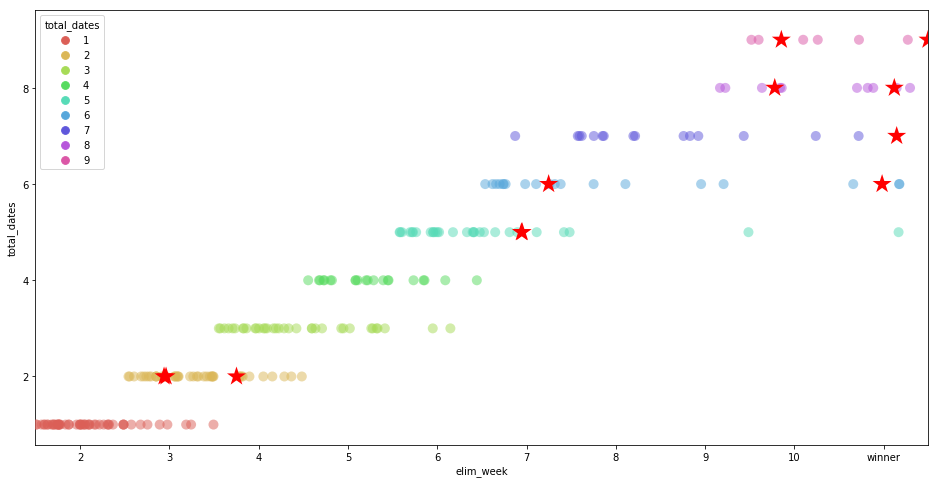

In [115]:
plt.figure(figsize=(16,8))
sns.stripplot(bachelorette_df.elim_week, bachelorette_df.total_dates, data=bachelorette_df, 
           hue='total_dates', 
           palette='hls', size=10,
             jitter=.5, order=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'winner'], alpha=.5)
sns.stripplot(bachelorette_r1.elim_week, bachelorette_r1.total_dates, data=bachelorette_df, 
              marker='*', s=20, color='Red', order=['2', '3', '4', '5', '6', '7', '8', '9','10','winner'], jitter=.5)

Text(0.5,1,'Success of Contestants with the First Impression Rose and First Date')

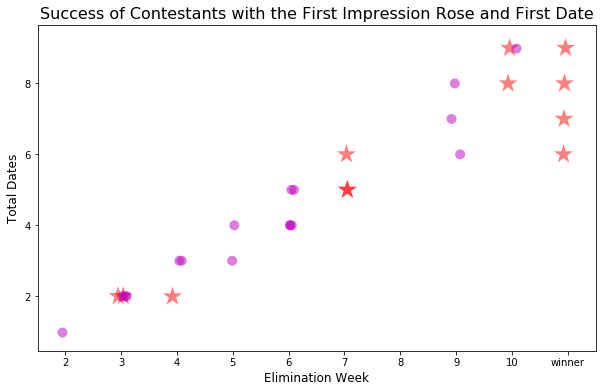

In [116]:
plt.figure(figsize=(10,6))

sns.stripplot(bachelorette_r1.elim_week, bachelorette_r1.total_dates, data=bachelorette_df, 
              marker='*', s=20, color='Red', order=['2', '3', '4', '5', '6', '7', '8', '9','10','winner'], alpha=.5, jitter=True)
sns.stripplot(bachelorette_d1.elim_week, bachelorette_d1.total_dates, data=bachelorette_df, 
               s=10, color='m', order=['2', '3', '4', '5', '6', '7', '8', '9','10','winner'], jitter=True, alpha=.5)
plt.xlabel('Elimination Week', fontsize=12)
plt.ylabel('Total Dates', fontsize=12)
plt.title('Success of Contestants with the First Impression Rose and First Date', fontsize=16)

### Bachelor Visualization

In [117]:
guy_lead=new_bach_df[new_bach_df.SHOW != 'Bachelorette']
guy_lead.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
352,Bachelor,21,21_VANESSA_G,R1,D12,winner,9
353,Bachelor,21,21_RAVEN_G,NaN,D12,10,8
354,Bachelor,21,21_RACHEL_L,NaN,NaN,9,7
355,Bachelor,21,21_CORRINE_O,NaN,D12,8,7
356,Bachelor,21,21_KRISTINA_S,NaN,D6,7,6


In [118]:
#bachelor first impression rose
bachelor_r1=guy_lead[guy_lead['ELIMINATION-1']=='R1']
bachelor_r1.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
352,Bachelor,21,21_VANESSA_G,R1,D12,winner,9
390,Bachelor,20,20_OLIVIA_C,R1,D6,6,5
417,Bachelor,19,19_BRITT_N,R1,D11,7,6
448,Bachelor,18,18_SHARLEEN_J,R1,NaN,7,5
476,Bachelor,17,17_TIERRA_L,R1,D13,7,5


In [119]:
#bachelor first date
bachelor_d1=guy_lead[guy_lead['DATES-2']=='D1']
bachelor_d1.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,DATES-2,elim_week,total_dates
357,Bachelor,21,21_DANIELLE_M,NaN,D1,7,5
385,Bachelor,20,20_CAILA_Q,NaN,D1,9,7
418,Bachelor,19,19_MEGAN_B,NaN,D1,6,4
444,Bachelor,18,18_CLARE_C,NaN,D1,10,8
449,Bachelor,18,18_KAT_H,NaN,D1,6,4


Text(0.5,1,'Success of Contestants with the First Impression Rose and First Date')

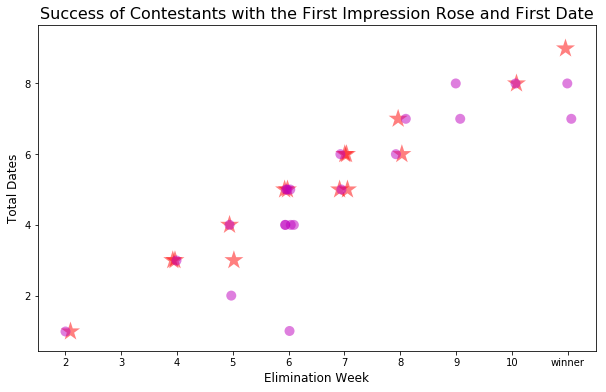

In [120]:
plt.figure(figsize=(10,6))

sns.stripplot(bachelor_r1.elim_week, bachelor_r1.total_dates, data=guy_lead, 
              marker='*', s=20, color='Red', order=['2', '3', '4', '5', '6', '7', '8', '9','10','winner'], alpha=.5, jitter=True)
sns.stripplot(bachelor_d1.elim_week, bachelor_d1.total_dates, data=guy_lead, 
               s=10, color='m', order=['2', '3', '4', '5', '6', '7', '8', '9','10','winner'], jitter=True, alpha=.5)
plt.xlabel('Elimination Week', fontsize=12)
plt.ylabel('Total Dates', fontsize=12)
plt.title('Success of Contestants with the First Impression Rose and First Date', fontsize=16)